In [130]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기


In [131]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
# [ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [132]:
length = bream_length + smelt_length
weight = bream_weight+smelt_weight
results = [1]*35+[0]*14

In [133]:
data = [length,weight,results]
df = pd.DataFrame(data)
df = df.T
df.head()

,0,1,2
0,25.4,242.0,1.0
1,26.3,290.0,1.0
2,26.5,340.0,1.0
3,29.0,363.0,1.0
4,29.0,430.0,1.0


In [134]:
datas = df.iloc[:,0:2]
results = df.iloc[:,2]

In [135]:
from sklearn.model_selection import train_test_split
# random_state=42 훈련세트,테스트세트가 할 때마다 섞이지 않도록 해줌.
# stratify : 설정데이터를 가지고 랜덤으로 데이터를 섞어줌
train_input,test_input,train_target,test_target = train_test_split(
    datas,results,stratify=results
    # , random_state=42
)

In [136]:
clf = KNeighborsClassifier()
clf.fit(train_input,train_target)

predict = clf.predict(test_input)
predict

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.])

In [137]:
score = clf.score(test_input,test_target)
print('정답룰 : ',score)

정답룰 :  1.0


In [138]:
predict = clf.predict([[30,600]])
print('판별 : ',predict)

판별 :  [1.]


In [139]:
# 25, 125의 고기를 측정하시오.
predict = clf.predict([[25,150]])
print('판별 : ',predict)

판별 :  [0.]


In [140]:
# 25, 150의 데이터는 knn 판별할 때 이웃하는 데이터는 indexes
distances,indexes = clf.kneighbors([[25,150]])
indexes

array([[35, 27, 30, 33, 24]])

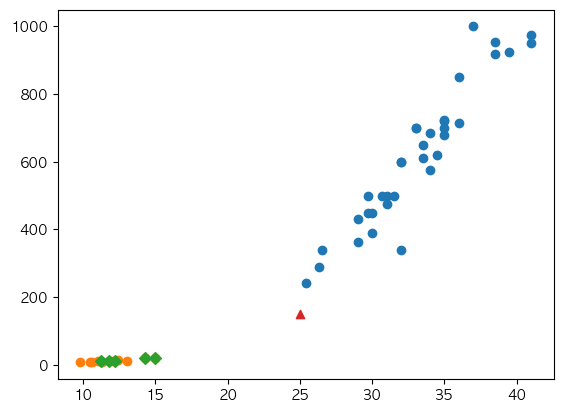

In [141]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)
plt.scatter(train_input.iloc[indexes[0],0],train_input.iloc[indexes[0],1],marker='D')
# plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='^')
# plt.xticks([0,1000]) 

In [142]:
# pandas - 평균, 표준편차
train_input.mean()
train_input.std()

0     10.618258
1    340.761638
dtype: float64

In [143]:
# 표준점수 : 훈련데이터 - 평균 / 표준편차
# numpy : 평균, 표준편차
type(train_input)

mean = np.mean(train_input,axis=0)
std = np.std(train_input, axis=0)

In [144]:
# train_input,test_input

train_scaled = (train_input - mean) / std
# test_scaled = (test_input - mean) / std

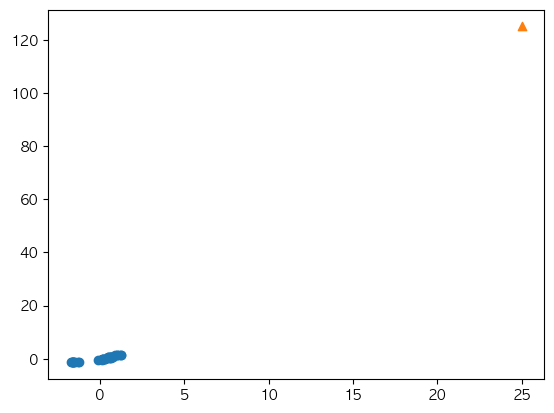

In [145]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(25,125,marker='^')

In [146]:
new = ([25,150]-mean)/std
new

0   -0.266907
1   -0.993995
dtype: float64

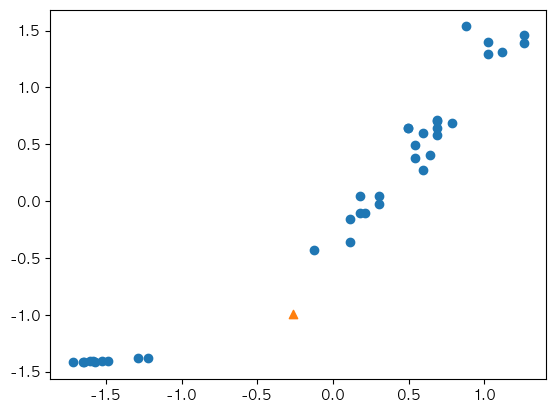

In [147]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(new[0],new[1],marker='^')

In [148]:
clf.fit(train_scaled,train_target)

KNeighborsClassifier()

In [149]:
test_scaled = (test_input - mean) / std

In [150]:
score = clf.score(test_scaled,test_target)
print('정답률 : ',score)

정답률 :  1.0


In [151]:
predict = clf.predict([new])
print('예측값 : ',predict)

예측값 :  [1.]


In [152]:
# knn 예측에 사용한 데이터
distances, indexs = clf.kneighbors([new])
indexs

array([[26,  9, 23, 25, 22]])

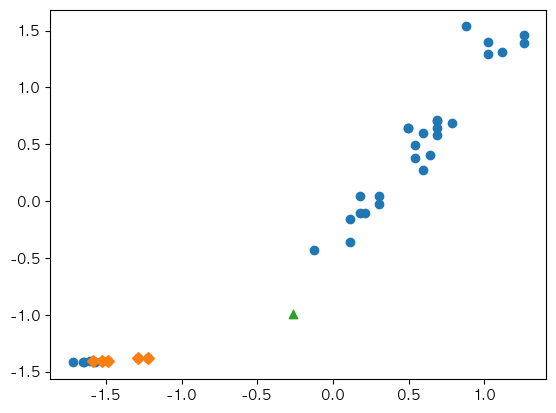

In [153]:
plt.scatter(train_scaled.iloc[:,0],train_scaled.iloc[:,1])
plt.scatter(train_scaled.iloc[indexes[0],0],train_scaled.iloc[indexes[0],1],marker='D')
plt.scatter(new[0],new[1],marker='^')
# plt.xticks([0,1000]) 